In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv  # openCV
from sklearn import utils
from tqdm.notebook import tqdm   # progressbar 처리
import os   # file의 경로를 설정하기 위해 필요

In [9]:
# 폴더 경로 설정
train_dir = 'C:\jupyter_home\Machin_Learning\data\cat_dog\\train'

# label(target)을 알아내기 위한 함수
# cat => 0   /   dog => 1
# img는 파일이름(cat.0.jpg)
def labeling(img):
    class_name = img.split('.')[0]
    if class_name =='cat' :
        return 0
    if class_name =='dog' :
        return 1
    

# label data(t_data)와 pixel data(x_data)를 저장할 변수를 하나 만듬
x_data = []
t_data = []

In [10]:
print(train_dir)

C:\jupyter_home\Machin_Learning\data\cat_dog\train


In [17]:
# 파일을 하나씩 반복하면서 처리
# 특정 폴더에 있는 모든 파일명을 알아야함 => os.listdir()

for img in tqdm(os.listdir(train_dir),
               total=len(os.listdir(train_dir)),
               position=0,
               leave=True):
    
    label_data = labeling(img)  # 0 or 1
    
    img_path = os.path.join(train_dir,img)
    
    # img_path(이미지 full-path를 이용해서 opencv를 통해 픽셀 데이터 추출)
    img_data = cv.resize(cv.imread(img_path, cv.IMREAD_GRAYSCALE), (80,80))
    
    t_data.append(label_data)
    x_data.append(img_data.ravel())

  0%|          | 0/25000 [00:00<?, ?it/s]

In [20]:
t_df = pd.DataFrame({
    'label': t_data
})
display(t_df.head())

,label
0,0
1,0
2,0
3,0
4,0


In [21]:
x_df = pd.DataFrame(x_data)
display(x_df.head())

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,-87,-82,-76,-72,-68,-65,-60,-58,-55,-53,...,3,3,3,3,2,2,2,2,2,2
1,-87,-82,-76,-72,-68,-65,-60,-58,-55,-53,...,3,3,3,3,2,2,2,2,2,2
2,43,43,58,45,35,28,40,52,37,41,...,38,39,44,53,59,57,70,71,47,33
3,42,38,45,46,58,57,54,59,48,51,...,88,126,-100,-91,-119,-121,-107,-94,-85,-102
4,-36,-32,-31,-26,-33,-28,-26,-31,-28,-29,...,-20,-24,-28,-52,-52,-53,-40,-35,-44,-43


In [22]:
# x_data와 t_data를 결합
df = pd.merge(t_df, x_df, left_index=True, right_index=True)
display(df.head())

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,-87,-82,-76,-72,-68,-65,-60,-58,-55,...,3,3,3,3,2,2,2,2,2,2
1,0,-87,-82,-76,-72,-68,-65,-60,-58,-55,...,3,3,3,3,2,2,2,2,2,2
2,0,43,43,58,45,35,28,40,52,37,...,38,39,44,53,59,57,70,71,47,33
3,0,42,38,45,46,58,57,54,59,48,...,88,126,-100,-91,-119,-121,-107,-94,-85,-102
4,0,-36,-32,-31,-26,-33,-28,-26,-31,-28,...,-20,-24,-28,-52,-52,-53,-40,-35,-44,-43


In [23]:
# shuffle을 이용해서 dataframe의 row를 섞어줌
shuffle_df = utils.shuffle(df)
display(shuffle_df.head())

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
3174,0,77,78,84,87,89,79,87,87,87,...,121,113,114,120,118,120,113,118,111,112
15392,1,36,29,-104,-114,-116,-119,-116,-114,-123,...,75,70,77,73,82,70,65,69,57,59
11177,0,13,13,13,13,13,13,13,13,13,...,36,37,67,72,56,41,31,26,17,23
7062,0,25,27,27,28,30,30,30,30,31,...,5,6,4,4,5,4,4,4,6,6
3055,0,-59,-76,-65,-55,-78,-53,-59,-57,-65,...,68,72,71,65,62,58,67,63,65,64


In [24]:
# 최종적으로 만들어진 DataFrame을 파일로 저장
shuffle_df.to_csv('C:\jupyter_home\Machin_Learning\data\cat_dog\\train.csv', index=False)

In [25]:
import os, shutil

original_dataset_dir = '../data/cat_dog/train'

base_dir = '../data/cat_dog_full'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train').replace('\\','/')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation').replace('\\','/')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test').replace('\\','/')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir,'cats').replace('\\','/')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs').replace('\\','/')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats').replace('\\','/')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs').replace('\\','/')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats').replace('\\','/')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs').replace('\\','/')
os.mkdir(test_dogs_dir)

## file 복사 ##
## 고양이와 멍멍이가 각각 12,500개
## train : 7,000 
## validation : 3,000
## test : 2,500 

fnames = ['cat.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

Found 14000 images belonging to 2 classes.
Found 14000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


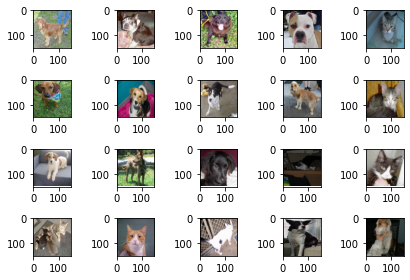

In [2]:
# Keras가 제공하는 ImageDataGenerator 사용에 대해 알아봅시당

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '../data/cat_dog_full/train'              # cats 폴더, dogs 폴더
valid_dir = '../data/cat_dog_full/validation'         # 

# ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,   # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,   # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)


figure = plt.figure()
ax = []

for i in range(20):
    ax.append(figure.add_subplot(4,5,i+1))

    
for x_data, t_data in train_generator:
    print(x_data.shape)   # (20, 150, 150, 3)
    print(t_data.shape)
    
    for idx, img_data in enumerate(x_data):
        ax[idx].imshow(img_data)
        
    break
    
plt.tight_layout()
plt.show()